In [1]:
# Importing Library 
import warnings
warnings.filterwarnings('ignore')

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns, objective_functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyfolio

In [2]:
tickers = ['SIE', 'DTE', 'ALV', 'MRK', 'DHL']

In [3]:
# Split the Data into Training and Test set
# Set date variable
start_date = '2010-01-04' # Start date of training set
end_date = '2020-10-08' # End date of training set
test_start_date = '2020-10-09' # End date of test set
test_end_date = '2023-06-30' # End date of test set

In [4]:
df1 = pd.read_csv("XGBoost_1 feature.csv")
df2 = pd.read_csv("XGBoost_2 feature.csv")
df3 = pd.read_csv("XGBoost_3 feature.csv")

In [5]:
actual_returns = pd.read_csv("actual_returns.csv", index_col=[0])
actual_test = pd.read_csv("actual_test.csv")

In [6]:
actual_test

,SIE,DTE,ALV,MRK,DHL
0,88.108665,12.722281,172.650269,97.990036,29.719999
1,88.153114,12.755207,170.705826,98.225822,29.760000
2,88.775276,12.941236,173.379425,99.027473,30.315001
3,89.521896,12.929710,173.095856,99.970581,30.395000
4,87.922020,13.040010,174.473190,100.253517,30.520000
...,...,...,...,...,...
942,155.479996,19.695999,209.199997,152.600006,43.000000
943,157.559998,19.906000,211.300003,147.199997,43.500000
944,152.720001,20.030001,211.649994,150.500000,44.305000
945,150.580002,19.930000,211.050003,149.600006,44.195000


In [7]:
actual_returns

,SIE,DTE,ALV,MRK,DHL
Date,,,,,
2020-10-09,0.006496,-0.003806,0.002743,0.004987,0.007566
2020-10-12,0.007888,0.006599,0.010111,0.000000,0.000485
2020-10-13,-0.010673,0.003106,-0.019548,-0.003435,0.004116
2020-10-14,0.010428,-0.004128,0.003003,-0.016852,0.011575
2020-10-15,-0.027224,-0.031434,-0.028619,-0.035450,-0.029559
...,...,...,...,...,...
2023-06-26,-0.009555,0.007056,0.000239,-0.002288,-0.004399
2023-06-27,0.013378,0.010662,0.010038,-0.035387,0.011628
2023-06-28,-0.030718,0.006229,0.001656,0.022418,0.018506


# 1 Base scenario (2 features)

In [8]:
df2.head()

,Date,SIE,DTE,ALV,MRK,DHL,Forecasted
0,2010-01-04,39.892437,4.953136,45.519119,26.576839,13.980,N
1,2010-01-05,39.916805,4.911083,45.657921,26.381214,14.000,N
2,2010-01-06,40.063042,4.789590,46.012665,26.364910,14.155,N
3,2010-01-07,40.538315,4.698472,45.483131,26.919188,14.125,N
4,2010-01-08,40.794235,4.724171,45.236355,26.646120,14.460,N


In [9]:
df2.isna().sum()

Date          0
SIE           0
DTE           0
ALV           0
MRK           0
DHL           0
Forecasted    0
dtype: int64

In [10]:
df2.set_index('Date', inplace=True)
df2

,SIE,DTE,ALV,MRK,DHL,Forecasted
Date,,,,,,
2010-01-04,39.892437,4.953136,45.519119,26.576839,13.980000,N
2010-01-05,39.916805,4.911083,45.657921,26.381214,14.000000,N
2010-01-06,40.063042,4.789590,46.012665,26.364910,14.155000,N
2010-01-07,40.538315,4.698472,45.483131,26.919188,14.125000,N
2010-01-08,40.794235,4.724171,45.236355,26.646120,14.460000,N
...,...,...,...,...,...,...
2023-06-26,108.717712,13.444969,185.888901,123.686981,39.498695,Y
2023-06-27,108.717712,13.444969,185.888901,123.686981,39.498695,Y
2023-06-28,108.717712,13.444969,185.888901,123.686981,39.498695,Y


The forecast-prices-1.csv is included actual prices in train period and forecasted prices in test period.

In [11]:
# Split data set to training set and test set
train = df2.loc[:end_date] # this is actual prices
test = df2.loc[test_start_date:] # this is estimated prices which resulted from ML algorithms

In [12]:
test

,SIE,DTE,ALV,MRK,DHL,Forecasted
Date,,,,,,
2020-10-09,101.669128,13.011879,143.240204,123.926842,40.938217,Y
2020-10-12,102.533432,13.011879,143.022949,123.926842,40.938217,Y
2020-10-13,103.771355,13.112594,146.032196,123.926842,40.938217,Y
2020-10-14,101.563339,13.112594,144.866898,123.926842,40.938217,Y
2020-10-15,103.771355,13.112594,143.064255,123.926842,40.938217,Y
...,...,...,...,...,...,...
2023-06-26,108.717712,13.444969,185.888901,123.686981,39.498695,Y
2023-06-27,108.717712,13.444969,185.888901,123.686981,39.498695,Y
2023-06-28,108.717712,13.444969,185.888901,123.686981,39.498695,Y


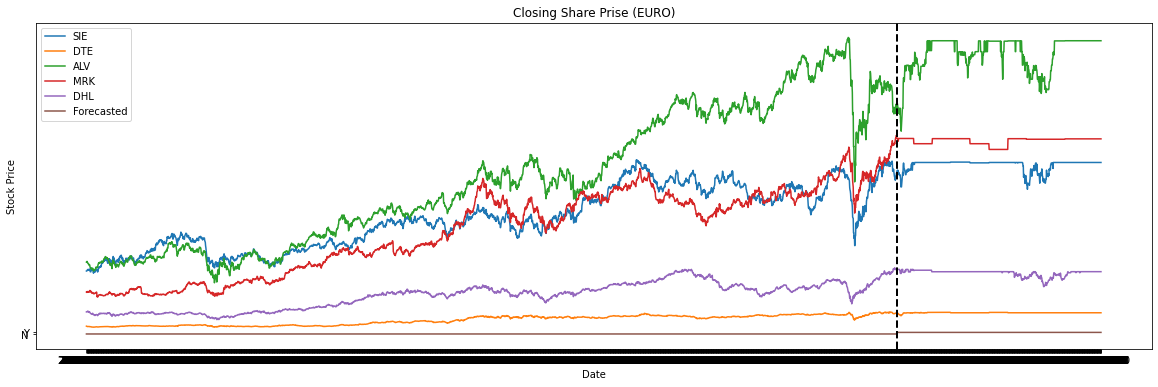

In [13]:
# Plot line chart for each stock
plt.figure(figsize=(20, 6))  # Set the figure size

for column in df2.columns:
    plt.plot(df2.index, df2[column], label=column)

# Add a vertical line at '2020-10-09'
plt.axvline(x='2020-10-09', color='black', linestyle='--', lw=2)

# Configure the plot
plt.title('Closing Share Prise (EURO)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Show the plot
plt.show()

In [14]:
# working days in a year 252
# Prices (include actual and estimated) which is used as input to calculate stock covariance
window = 252
start = len(train)-window
data = df2.iloc[start:]
data = data.reset_index(drop=True)
data = data[['SIE', 'DTE', 'ALV', 'MRK', 'DHL']]

In [15]:
# Forecasted returns which is used as input of optimization algorithm
forecast_returns_df2 = df2[['SIE', 'DTE', 'ALV', 'MRK', 'DHL']].pct_change()
forecast_returns2 = forecast_returns_df2.iloc[start:]
forecast_returns2 = forecast_returns2.reset_index(drop=True)

In [16]:
forecast_returns2

,SIE,DTE,ALV,MRK,DHL
0,0.027360,0.009932,0.028723,0.000482,-0.002648
1,0.000504,0.002588,-0.011262,0.002406,0.002186
2,0.007058,0.014585,0.015662,0.008161,0.000156
3,0.008410,-0.000891,-0.001636,0.009524,-0.004829
4,-0.017871,0.008531,0.007957,0.002830,-0.005949
...,...,...,...,...,...
942,0.000000,0.000000,0.000000,0.000000,0.000000
943,0.000000,0.000000,0.000000,0.000000,0.000000
944,0.000000,0.000000,0.000000,0.000000,0.000000
945,0.000000,0.000000,0.000000,0.000000,0.000000


## 1.1 Maximize the Sharpe ratio

In [17]:
# Perform Maximum the Sharpe ratio optimization model to calculate weights (Durall, 2022)
portfolio_weights_min_var_2 = np.zeros([test.shape[0], len(tickers)])

idx=0
for i in range(portfolio_weights_min_var_2.shape[0]):    
    sel = data.iloc[i+1:window+i+1]
    
    mu = expected_returns.mean_historical_return(sel)
    S = risk_models.sample_cov(sel)

    # optimize for max sharpe ratio
    ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
    
    try:
        weights = ef.max_sharpe()
    except:
        weights = ef.nonconvex_objective(
            objective_functions.sharpe_ratio,
            objective_args=(ef.expected_returns, ef.cov_matrix),
            weights_sum_to_one=True)
    weights = ef.clean_weights(cutoff=0.01, rounding=5)
    data.iloc[window+i] = actual_test.iloc[window+i]

    portfolio_weights_min_var_2[idx]=np.array([weights[j] for j in tickers])
    idx +=1

Text(0.5, 0, 'Time (Years-Months)')

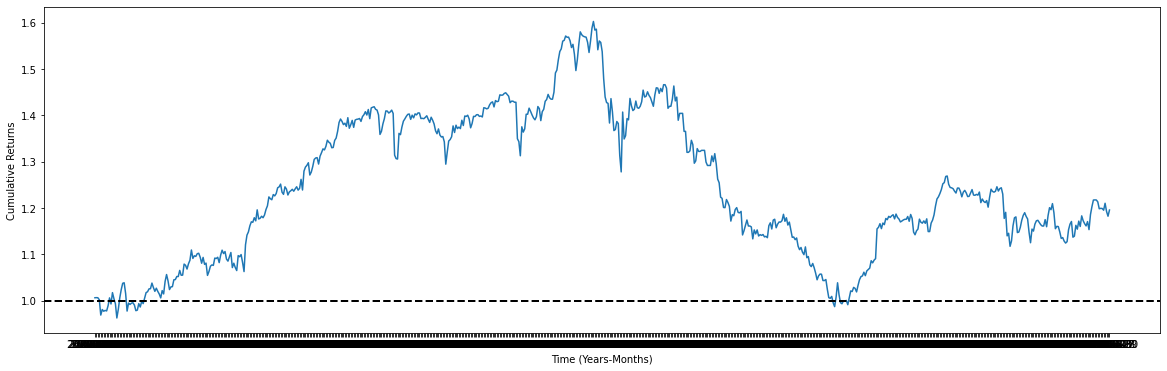

In [18]:
# Calculate porfolio returns from actual returns and resulted weights which is calculated above (Durall, 2022)
return_stocks_min_var_2 = np.sum(actual_returns.multiply(portfolio_weights_min_var_2), axis=1)
cumulative_returns_daily_min_var_2 = (1 + return_stocks_min_var_2).cumprod()
plt.figure(figsize=(20, 6))  # Set the figure size
plt.plot(cumulative_returns_daily_min_var_2)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")

In [19]:
# Calculate portfolio variance
portfolio_variance_min_var_2 = np.dot(portfolio_weights_min_var_2[-1].T, np.dot(np.cov(actual_returns, rowvar=False), portfolio_weights_min_var_2[-1]))
portfolio_variance_min_var_2

0.00020628276677220014

In [20]:
# Calculate standard deviation
std_min_var_2 = np.sqrt(portfolio_variance_min_var_2)
std_min_var_2

0.014362547363619036

In [21]:
# Calculate porfolio returns
cumulative_returns_daily_min_var_2[-1]

1.195491930216149

In [22]:
# Check negative weights
np.any(portfolio_weights_min_var_2 < 0)

False

In [23]:
return_stocks_min_var_2.index = pd.to_datetime(return_stocks_min_var_2.index)

Start date,2020-10-09
End date,2023-06-30
Total months,33
,Backtest
Annual return,6.689%
Cumulative returns,19.549%
Annual volatility,21.545%
Sharpe ratio,0.41
Calmar ratio,0.17
Stability,0.00
Max drawdown,-38.438%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,38.44,2022-02-09,2022-09-30,NaT,NaN
1,9.40,2021-11-16,2021-11-30,2022-01-03,35
2,8.75,2021-07-13,2021-09-20,2021-11-01,80
3,5.89,2020-11-06,2020-11-10,2020-12-16,29
4,5.38,2020-10-27,2020-10-30,2020-11-04,7


Stress Events,mean,min,max
New Normal,0.03%,-6.41%,10.12%


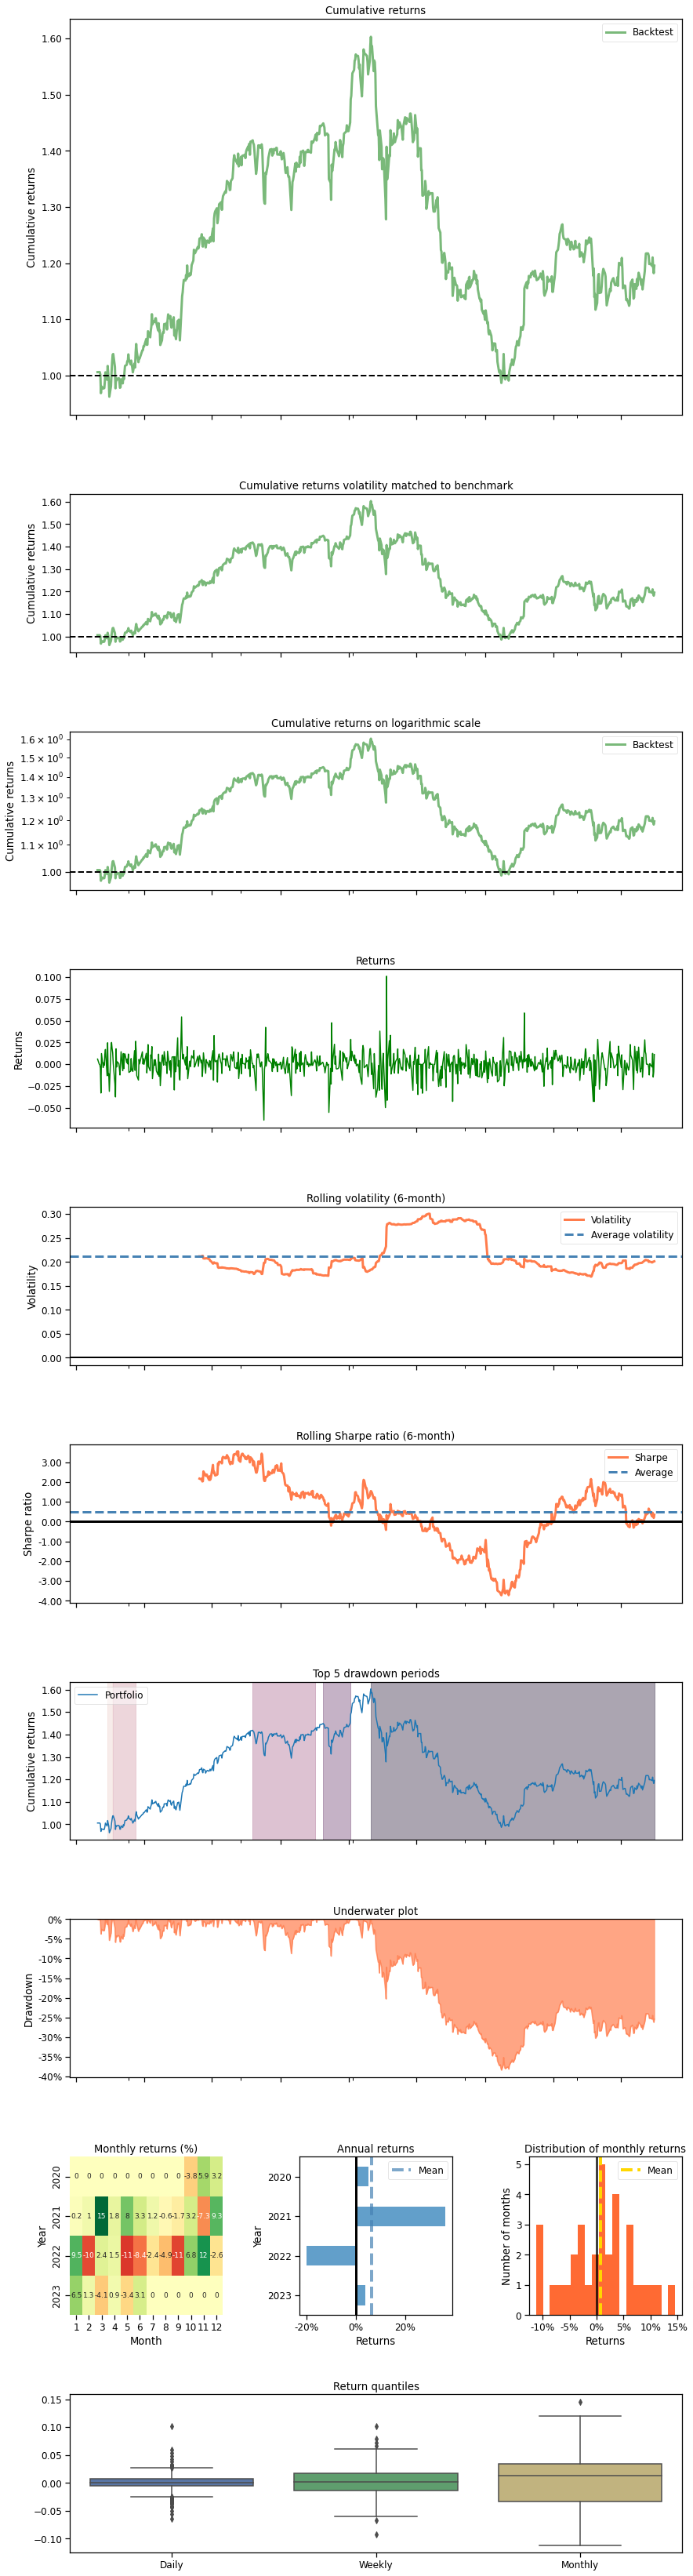

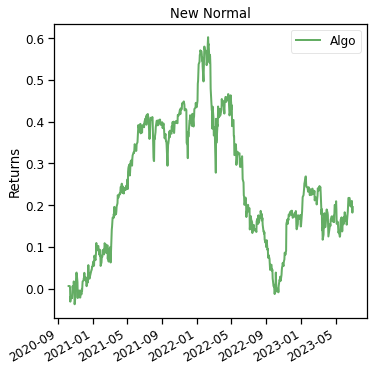

In [24]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = return_stocks_min_var_2, set_context=False)

Text(0.5, 0, 'Time (Years-Months)')

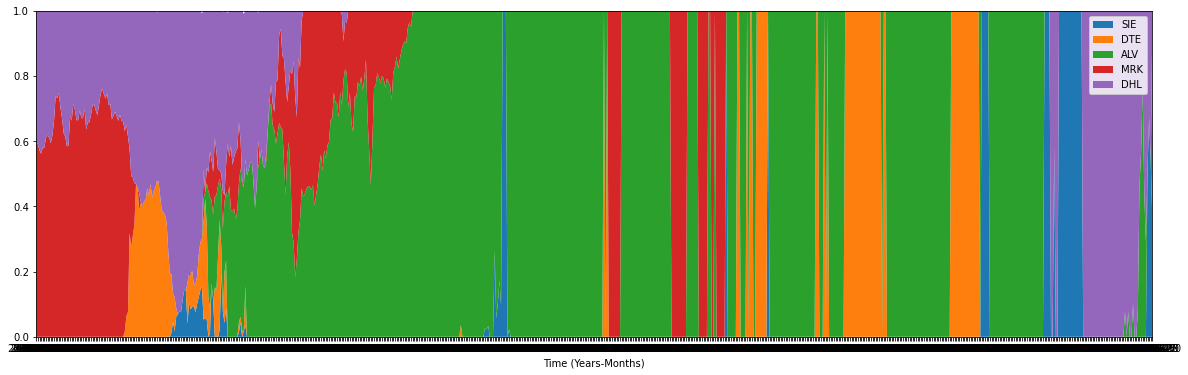

In [25]:
df_plot = pd.DataFrame (portfolio_weights_min_var_2, index = test.index, columns = tickers)
plt.figure(figsize=(20, 6))  # Set the figure size
plt.stackplot(test.index, df_plot['SIE'], df_plot['DTE'], df_plot['ALV'], df_plot['MRK'], df_plot['DHL'], labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel("Time (Years-Months)")

In [26]:
df_plot

,SIE,DTE,ALV,MRK,DHL
Date,,,,,
2020-10-09,0.00000,0.0,0.00000,0.59889,0.40111
2020-10-12,0.00000,0.0,0.00000,0.58911,0.41089
2020-10-13,0.00000,0.0,0.00000,0.57155,0.42845
2020-10-14,0.00000,0.0,0.00000,0.56144,0.43856
2020-10-15,0.00000,0.0,0.00000,0.58067,0.41933
...,...,...,...,...,...
2023-06-26,0.00000,0.0,0.29132,0.00000,0.70868
2023-06-27,0.50719,0.0,0.00000,0.00000,0.49281
2023-06-28,0.67295,0.0,0.00000,0.00000,0.32705


In [27]:
df_plot.to_csv('XGBoost_min_var_2.csv', index=True)

## 1.2 Minimize the volatility

In [28]:
# working days in a year 252
# Prices (include actual and estimated) which is used as input to calculate stock covariance
window = 252
start = len(train)-window
data = df2.iloc[start:]
data = data.reset_index(drop=True)
data = data[['SIE', 'DTE', 'ALV', 'MRK', 'DHL']]

In [29]:
data

,SIE,DTE,ALV,MRK,DHL
0,88.108665,12.722281,172.650269,97.990036,32.020000
1,88.153107,12.755207,170.705811,98.225822,32.090000
2,88.775276,12.941236,173.379425,99.027466,32.095001
3,89.521896,12.929710,173.095856,99.970581,31.940001
4,87.922012,13.040010,174.473190,100.253525,31.750000
...,...,...,...,...,...
942,108.717712,13.444969,185.888901,123.686981,39.498695
943,108.717712,13.444969,185.888901,123.686981,39.498695
944,108.717712,13.444969,185.888901,123.686981,39.498695
945,108.717712,13.444969,185.888901,123.686981,39.498695


In [30]:
actual_test

,SIE,DTE,ALV,MRK,DHL
0,88.108665,12.722281,172.650269,97.990036,29.719999
1,88.153114,12.755207,170.705826,98.225822,29.760000
2,88.775276,12.941236,173.379425,99.027473,30.315001
3,89.521896,12.929710,173.095856,99.970581,30.395000
4,87.922020,13.040010,174.473190,100.253517,30.520000
...,...,...,...,...,...
942,155.479996,19.695999,209.199997,152.600006,43.000000
943,157.559998,19.906000,211.300003,147.199997,43.500000
944,152.720001,20.030001,211.649994,150.500000,44.305000
945,150.580002,19.930000,211.050003,149.600006,44.195000


In [31]:
# Perform Minimum variance optimization model to calculate weights (Durall, 2022)
portfolio_weights_min_vol_2 = np.zeros([test.shape[0], len(tickers)])

idx=0
for i in range(portfolio_weights_min_vol_2.shape[0]):    
    sel = data.iloc[i+1:window+i+1]
    
    mu = expected_returns.mean_historical_return(sel)
    S = risk_models.sample_cov(sel)

    # optimize for max sharpe ratio
    ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
     
    weights = ef.min_volatility()
    weights = ef.clean_weights(cutoff=0.01, rounding=5)
    data.iloc[window+i] = actual_test.iloc[window+i]
   
    portfolio_weights_min_vol_2[idx]=np.array([weights[j] for j in tickers])
    idx +=1

Text(0.5, 0, 'Time (Years-Months)')

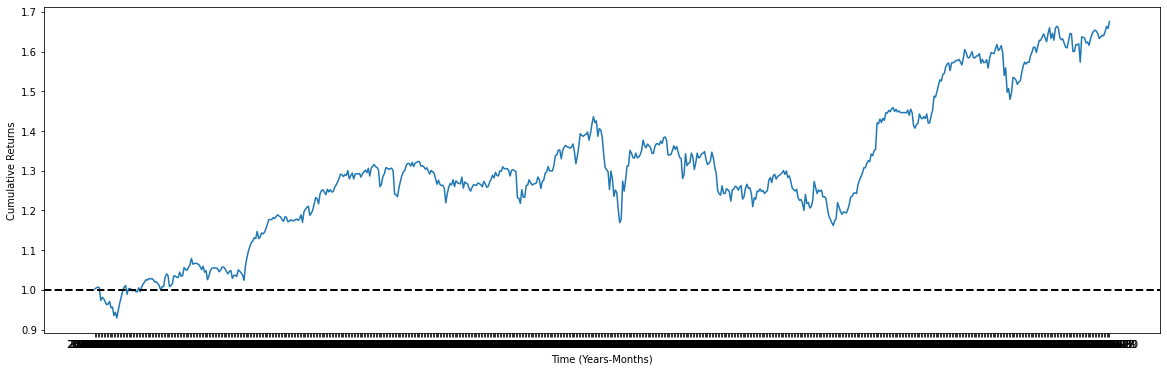

In [32]:
# Calculate porfolio returns from actual returns and resulted weights which is calculated above (Durall, 2022)
return_stocks_min_vol_2 = np.sum(actual_returns.multiply(portfolio_weights_min_vol_2), axis=1)
cumulative_returns_daily_min_vol_2 = (1 + return_stocks_min_vol_2).cumprod()
plt.figure(figsize=(20, 6))  # Set the figure size
plt.plot(cumulative_returns_daily_min_vol_2)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")

In [33]:
# Calculate portfolio variance
portfolio_variance_min_vol_2 = np.dot(portfolio_weights_min_vol_2[-1].T, np.dot(np.cov(actual_returns, rowvar=False), portfolio_weights_min_vol_2[-1]))
portfolio_variance_min_vol_2

0.00015694567593026737

In [34]:
# Calculate standard deviation
std_min_vol_2 = np.sqrt(portfolio_variance_min_vol_2)
std_min_vol_2

0.012527796132212056

In [35]:
# Calculate porfolio returns
cumulative_returns_daily_min_vol_2[-1]

1.675932096306441

In [36]:
# Check negative weights
np.any(portfolio_variance_min_vol_2 < 0)

False

In [37]:
return_stocks_min_vol_2.index = pd.to_datetime(return_stocks_min_vol_2.index)

Start date,2020-10-09
End date,2023-06-30
Total months,33
,Backtest
Annual return,20.591%
Cumulative returns,67.593%
Annual volatility,18.764%
Sharpe ratio,1.09
Calmar ratio,1.08
Stability,0.75
Max drawdown,-19.073%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,19.07,2022-02-09,2022-09-29,2022-11-18,203
1,8.55,2023-03-06,2023-03-17,2023-04-19,33
2,8.00,2021-08-24,2021-11-30,2022-01-04,96
3,7.73,2020-10-13,2020-10-30,2020-11-09,20
4,6.18,2021-07-13,2021-08-04,2021-08-13,24


Stress Events,mean,min,max
New Normal,0.08%,-5.06%,8.15%


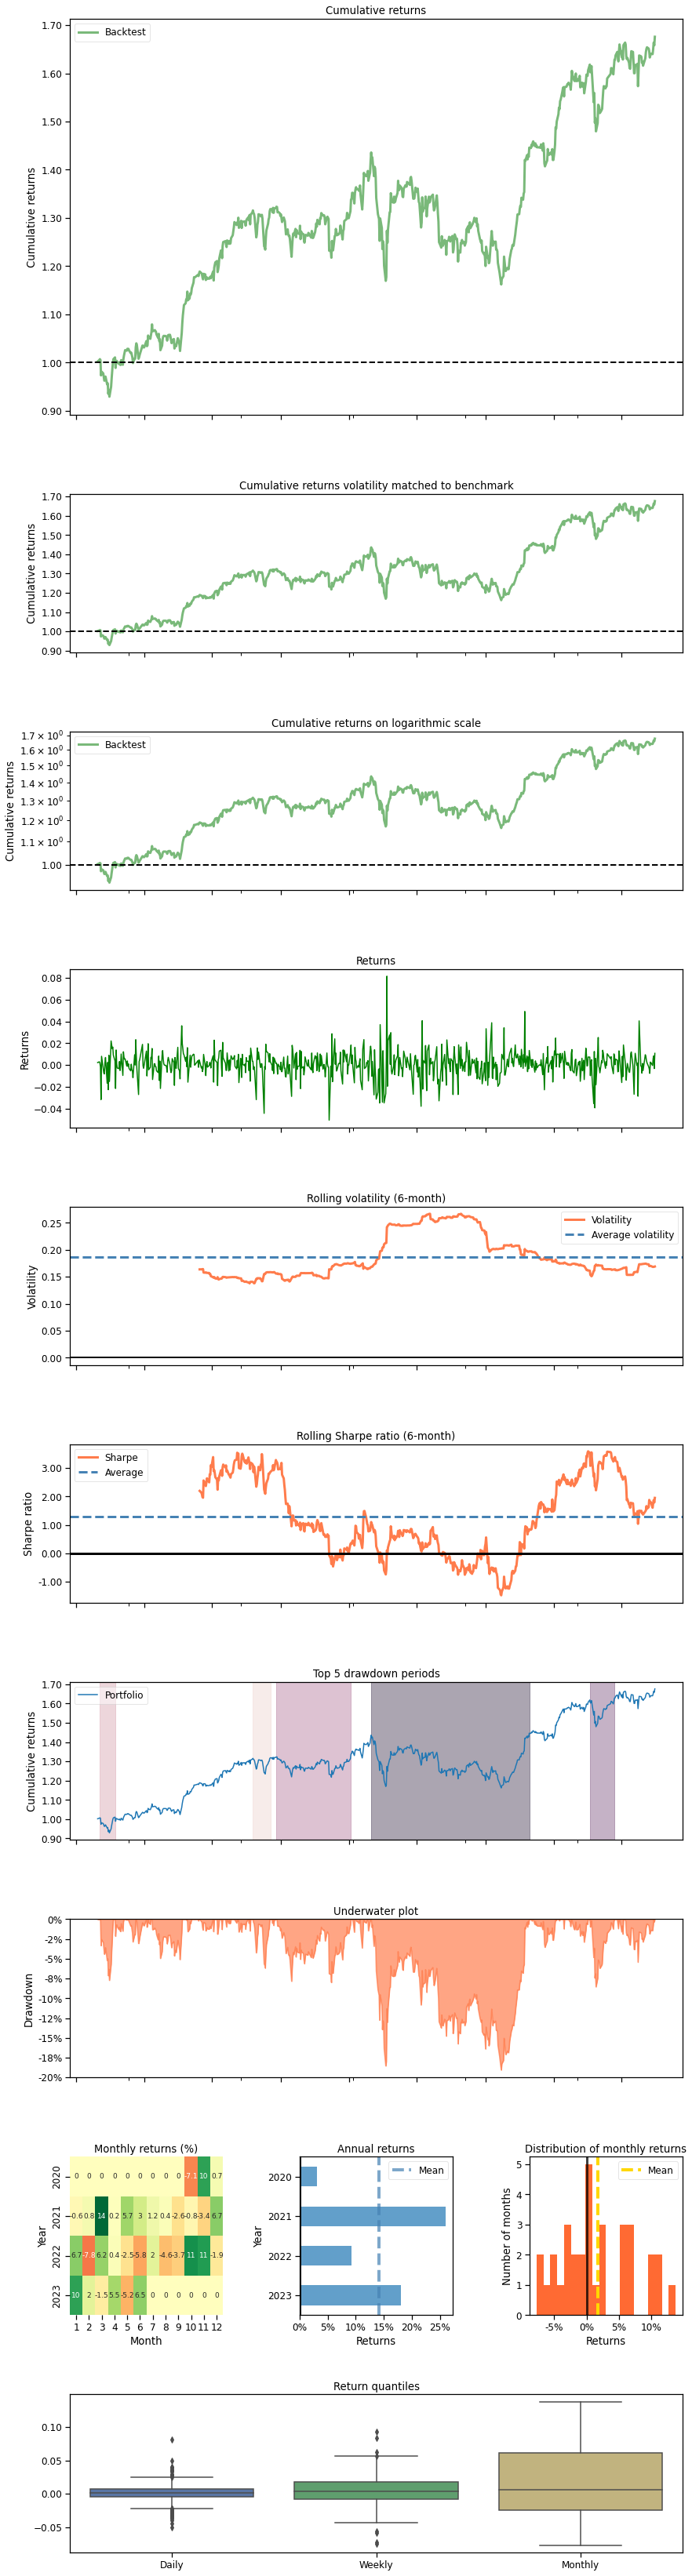

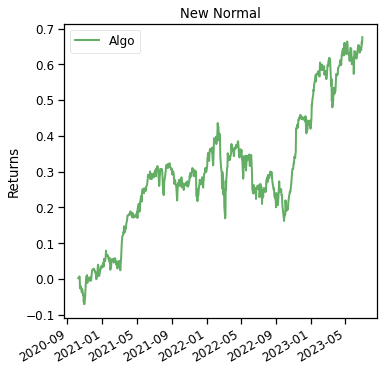

In [38]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = return_stocks_min_vol_2, set_context=False)

Text(0.5, 0, 'Time (Years-Months)')

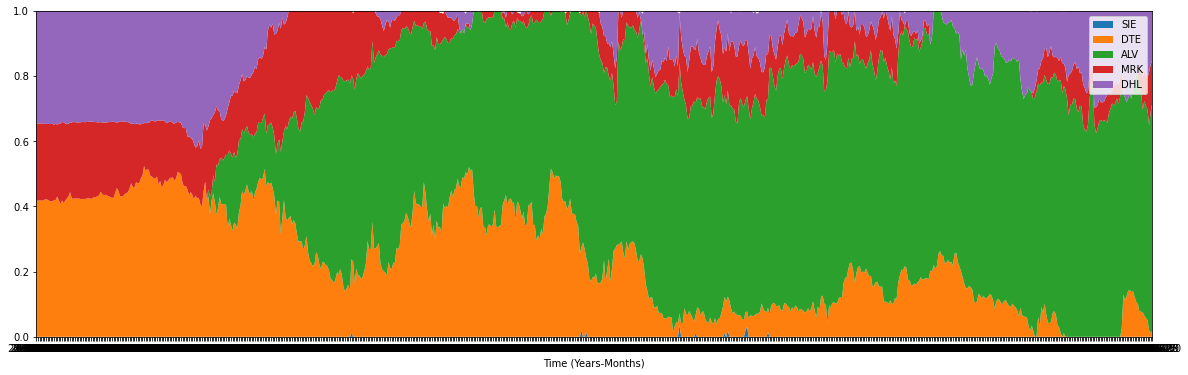

In [39]:
df_plot = pd.DataFrame (portfolio_weights_min_vol_2, index = test.index, columns = tickers)
plt.figure(figsize=(20, 6))  # Set the figure size
plt.stackplot(test.index, df_plot['SIE'], df_plot['DTE'], df_plot['ALV'], df_plot['MRK'], df_plot['DHL'], labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel("Time (Years-Months)")

In [40]:
df_plot

,SIE,DTE,ALV,MRK,DHL
Date,,,,,
2020-10-09,0.0,0.41529,0.00000,0.23818,0.34653
2020-10-12,0.0,0.41804,0.00000,0.23593,0.34603
2020-10-13,0.0,0.41789,0.00000,0.23606,0.34605
2020-10-14,0.0,0.41783,0.00000,0.23640,0.34577
2020-10-15,0.0,0.41722,0.00000,0.23724,0.34554
...,...,...,...,...,...
2023-06-26,0.0,0.05772,0.65057,0.09196,0.19975
2023-06-27,0.0,0.05057,0.64644,0.09601,0.20698
2023-06-28,0.0,0.02007,0.62763,0.16490,0.18740


In [41]:
df_plot.to_csv('XGBoost_min_vol_2.csv', index=True)

# 2 Less features scenario (1 feature)

In [42]:
df1.head()

,Date,SIE,DTE,ALV,MRK,DHL,Forecasted
0,2010-01-04,39.892437,4.953136,45.519119,26.576839,13.980,N
1,2010-01-05,39.916805,4.911083,45.657921,26.381214,14.000,N
2,2010-01-06,40.063042,4.789590,46.012665,26.364910,14.155,N
3,2010-01-07,40.538315,4.698472,45.483131,26.919188,14.125,N
4,2010-01-08,40.794235,4.724171,45.236355,26.646120,14.460,N


In [43]:
len(df1)

3449

In [44]:
df1.isna().sum()

Date          0
SIE           0
DTE           0
ALV           0
MRK           0
DHL           0
Forecasted    0
dtype: int64

In [45]:
df1.set_index('Date', inplace=True)
df1

,SIE,DTE,ALV,MRK,DHL,Forecasted
Date,,,,,,
2010-01-04,39.892437,4.953136,45.519119,26.576839,13.980000,N
2010-01-05,39.916805,4.911083,45.657921,26.381214,14.000000,N
2010-01-06,40.063042,4.789590,46.012665,26.364910,14.155000,N
2010-01-07,40.538315,4.698472,45.483131,26.919188,14.125000,N
2010-01-08,40.794235,4.724171,45.236355,26.646120,14.460000,N
...,...,...,...,...,...,...
2023-06-26,109.097946,13.762123,185.911041,122.272835,40.532909,Y
2023-06-27,109.097946,13.762123,185.911041,122.272835,40.532909,Y
2023-06-28,109.097946,13.762123,185.911041,122.272835,40.532909,Y


In [46]:
# Split data set to training set and test set
train = df1.loc[:end_date] # this is actual prices
test = df1.loc[test_start_date:] # this is estimated prices which resulted from ML algorithms

In [47]:
test

,SIE,DTE,ALV,MRK,DHL,Forecasted
Date,,,,,,
2020-10-09,102.095337,13.034712,144.070068,122.272835,40.532909,Y
2020-10-12,102.502693,13.034712,144.756256,122.272835,40.532909,Y
2020-10-13,103.434082,13.139820,145.756409,122.272835,40.532909,Y
2020-10-14,101.449753,13.139820,144.039581,122.272835,40.532909,Y
2020-10-15,103.434082,13.139820,143.562073,122.272835,40.532909,Y
...,...,...,...,...,...,...
2023-06-26,109.097946,13.762123,185.911041,122.272835,40.532909,Y
2023-06-27,109.097946,13.762123,185.911041,122.272835,40.532909,Y
2023-06-28,109.097946,13.762123,185.911041,122.272835,40.532909,Y


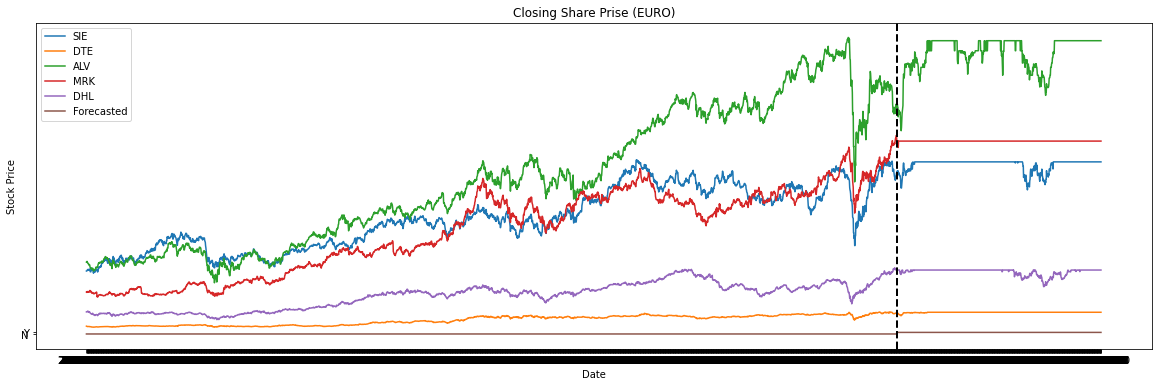

In [48]:
# Plot line chart for each stock
plt.figure(figsize=(20, 6))  # Set the figure size

for column in df1.columns:
    plt.plot(df1.index, df1[column], label=column)

# Add a vertical line at '2020-10-09'
plt.axvline(x='2020-10-09', color='black', linestyle='--', lw=2)

# Configure the plot
plt.title('Closing Share Prise (EURO)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Show the plot
plt.show()

In [49]:
# working days in a year 252
# Prices (include actual and estimated) which is used as input to calculate stock covariance
window = 252
start = len(train)-window
data = df1.iloc[start:]
data = data.reset_index(drop=True)
data = data[['SIE', 'DTE', 'ALV', 'MRK', 'DHL']]

In [50]:
# Forecasted returns which is used as input of optimization algorithm
forecast_returns_df1 = df1[['SIE', 'DTE', 'ALV', 'MRK', 'DHL']].pct_change()
forecast_returns1 = forecast_returns_df1.iloc[start:]
forecast_returns1 = forecast_returns1.reset_index(drop=True)

In [51]:
forecast_returns1

,SIE,DTE,ALV,MRK,DHL
0,0.027360,0.009932,0.028723,0.000482,-0.002648
1,0.000504,0.002588,-0.011262,0.002406,0.002186
2,0.007058,0.014585,0.015662,0.008161,0.000156
3,0.008410,-0.000891,-0.001636,0.009524,-0.004829
4,-0.017871,0.008531,0.007957,0.002830,-0.005949
...,...,...,...,...,...
942,0.000000,0.000000,0.000000,0.000000,0.000000
943,0.000000,0.000000,0.000000,0.000000,0.000000
944,0.000000,0.000000,0.000000,0.000000,0.000000
945,0.000000,0.000000,0.000000,0.000000,0.000000


## 2.1 Maximize the Sharpe ratio

In [52]:
# Perform Maximum the Sharpe ratio optimization model to calculate weights (Durall, 2022)
portfolio_weights_min_var_1 = np.zeros([test.shape[0], len(tickers)])

idx=0
for i in range(portfolio_weights_min_var_1.shape[0]):    
    sel = data.iloc[i+1:window+i+1]
    
    mu = expected_returns.mean_historical_return(sel)
    S = risk_models.sample_cov(sel)

    # optimize for max sharpe ratio
    ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
    
    try:
        weights = ef.max_sharpe()
    except:
        weights = ef.nonconvex_objective(
            objective_functions.sharpe_ratio,
            objective_args=(ef.expected_returns, ef.cov_matrix),
            weights_sum_to_one=True)
    weights = ef.clean_weights(cutoff=0.01, rounding=5)
    data.iloc[window+i] = actual_test.iloc[window+i]
    
    portfolio_weights_min_var_1[idx]=np.array([weights[j] for j in tickers])
    idx +=1

Text(0.5, 0, 'Time (Years-Months)')

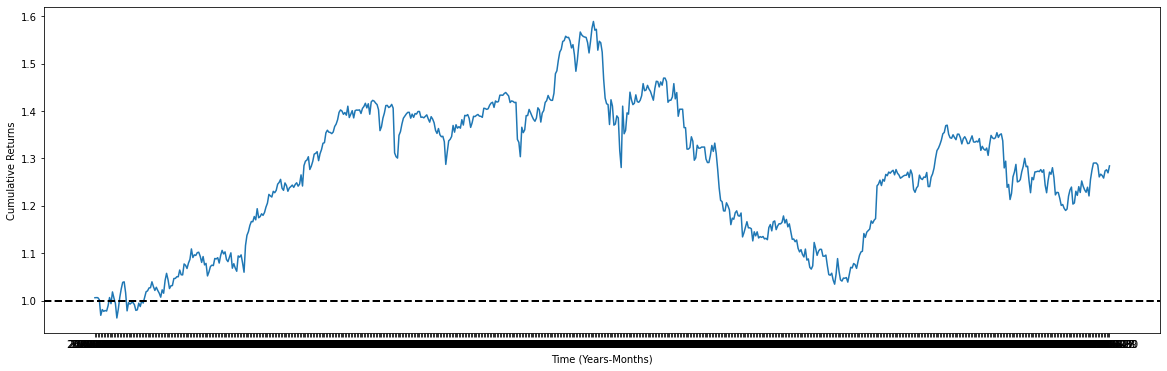

In [53]:
# Calculate porfolio returns from actual returns and resulted weights which is calculated above (Durall, 2022)
return_stocks_min_var_1 = np.sum(actual_returns.multiply(portfolio_weights_min_var_1), axis=1)
cumulative_returns_daily_min_var_1 = (1 + return_stocks_min_var_1).cumprod()
plt.figure(figsize=(20, 6))  # Set the figure size
plt.plot(cumulative_returns_daily_min_var_1)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")

In [54]:
# Calculate portfolio variance
portfolio_variance_min_var_1 = np.dot(portfolio_weights_min_var_1[-1].T, np.dot(np.cov(actual_returns, rowvar=False), portfolio_weights_min_var_1[-1]))
portfolio_variance_min_var_1

0.00019932616433691663

In [55]:
# Calculate standard deviation
std_min_var_1 = np.sqrt(portfolio_variance_min_var_1)
std_min_var_1

0.01411829183495357

In [56]:
# Calculate porfolio returns
cumulative_returns_daily_min_var_1[-1]

1.2842937225388673

In [57]:
# Check negative weights
np.any(portfolio_weights_min_var_1 < 0)

False

In [58]:
return_stocks_min_var_1.index = pd.to_datetime(return_stocks_min_var_1.index)

Start date,2020-10-09
End date,2023-06-30
Total months,33
,Backtest
Annual return,9.497%
Cumulative returns,28.429%
Annual volatility,21.931%
Sharpe ratio,0.52
Calmar ratio,0.27
Stability,0.05
Max drawdown,-34.899%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,34.90,2022-02-09,2022-09-30,NaT,NaN
1,9.50,2021-07-12,2021-09-20,2021-11-10,88
2,9.42,2021-11-16,2021-11-30,2022-01-04,36
3,5.89,2020-11-06,2020-11-10,2020-12-03,20
4,5.40,2020-10-27,2020-10-30,2020-11-04,7


Stress Events,mean,min,max
New Normal,0.05%,-6.72%,10.12%


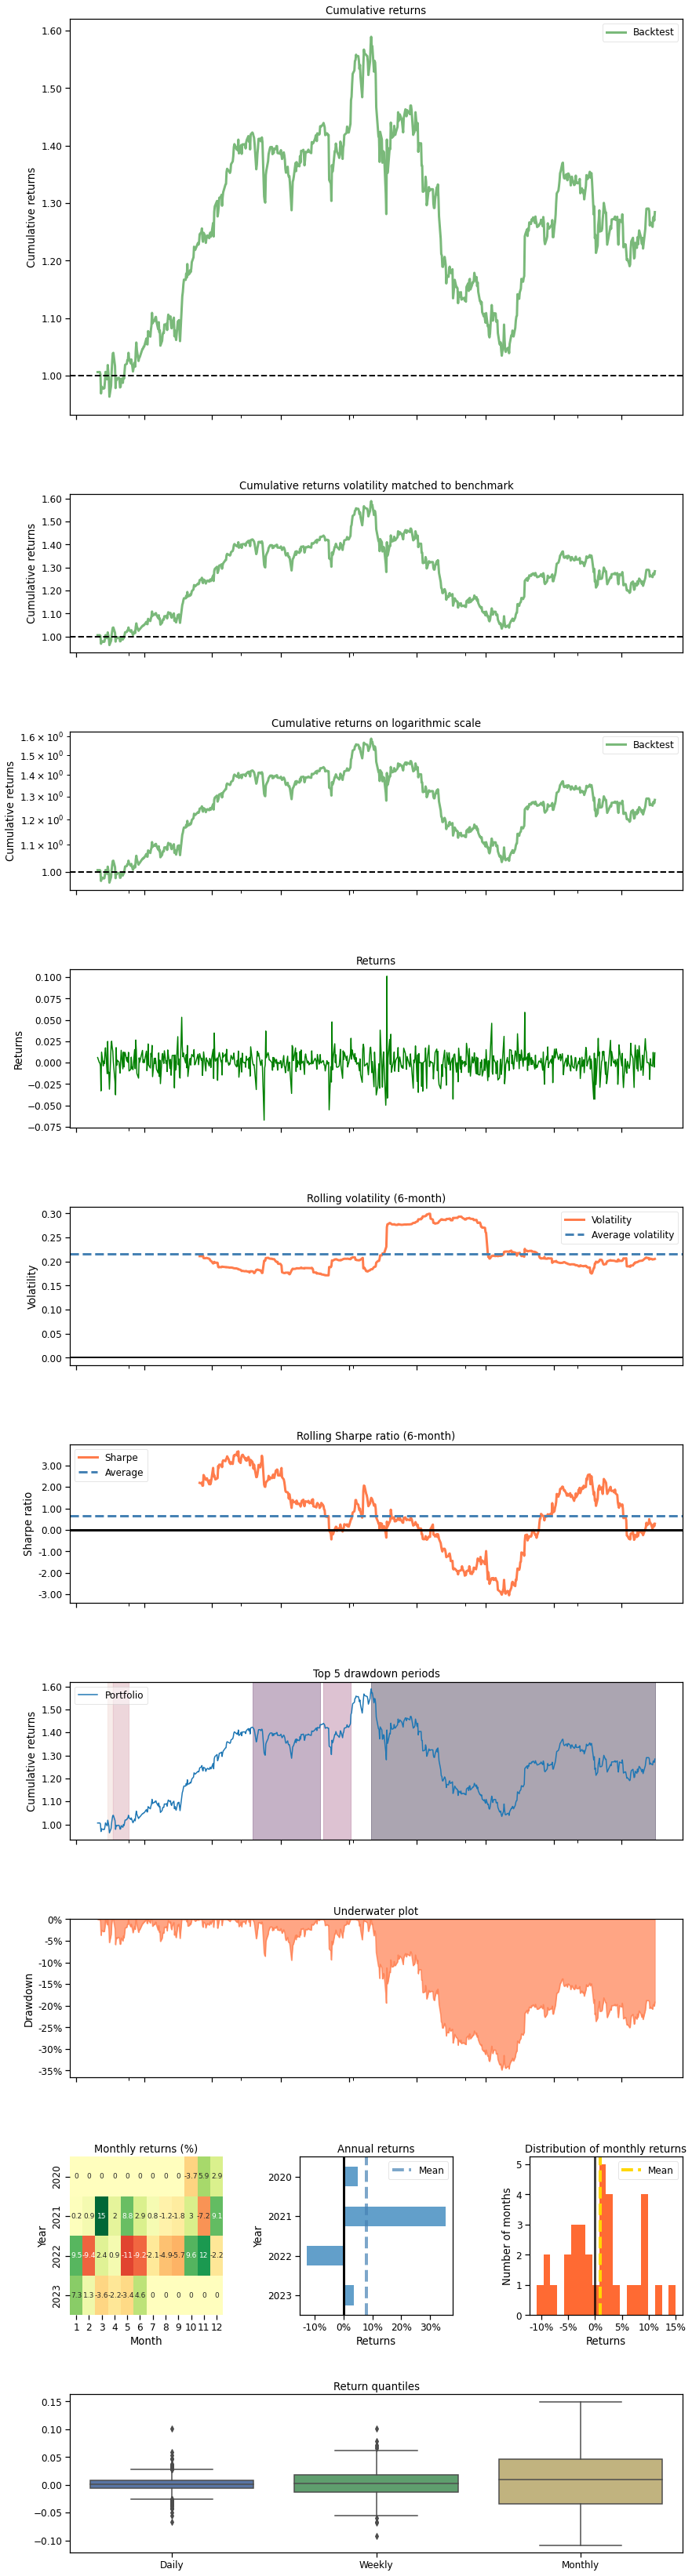

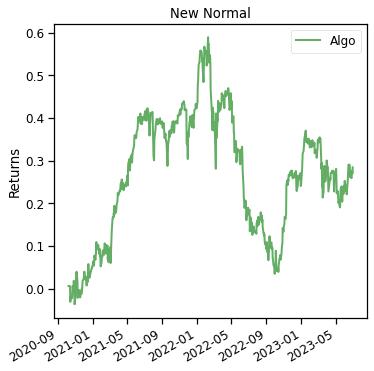

In [59]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = return_stocks_min_var_1, set_context=False)

Text(0.5, 0, 'Time (Years-Months)')

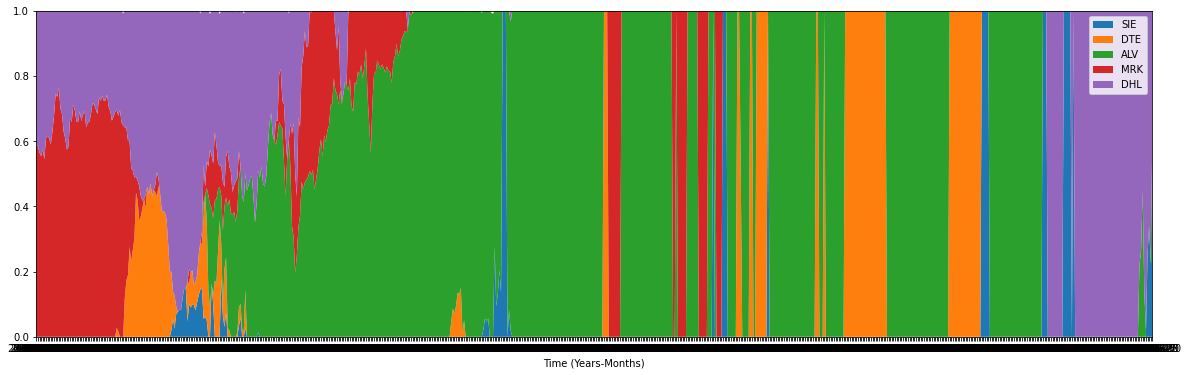

In [60]:
df_plot = pd.DataFrame (portfolio_weights_min_var_1, index = test.index, columns = tickers)
plt.figure(figsize=(20, 6))  # Set the figure size
plt.stackplot(test.index, df_plot['SIE'], df_plot['DTE'], df_plot['ALV'], df_plot['MRK'], df_plot['DHL'], labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel("Time (Years-Months)")

In [61]:
df_plot

,SIE,DTE,ALV,MRK,DHL
Date,,,,,
2020-10-09,0.00000,0.0,0.00000,0.59279,0.40721
2020-10-12,0.00000,0.0,0.00000,0.58312,0.41688
2020-10-13,0.00000,0.0,0.00000,0.56431,0.43569
2020-10-14,0.00000,0.0,0.00000,0.55390,0.44610
2020-10-15,0.00000,0.0,0.00000,0.57578,0.42422
...,...,...,...,...,...
2023-06-26,0.00000,0.0,0.01953,0.00000,0.98047
2023-06-27,0.24913,0.0,0.00000,0.00000,0.75087
2023-06-28,0.33815,0.0,0.00000,0.00000,0.66185


In [62]:
df_plot.to_csv('XGBoost_min_var_1.csv', index=True)

# 3 More features scenario (3 features)

In [63]:
df3.head()

,Date,SIE,DTE,ALV,MRK,DHL,Forecasted
0,2010-01-04,39.892437,4.953136,45.519119,26.576839,13.980,N
1,2010-01-05,39.916805,4.911083,45.657921,26.381214,14.000,N
2,2010-01-06,40.063042,4.789590,46.012665,26.364910,14.155,N
3,2010-01-07,40.538315,4.698472,45.483131,26.919188,14.125,N
4,2010-01-08,40.794235,4.724171,45.236355,26.646120,14.460,N


In [64]:
len(df3)

3449

In [65]:
df3.isna().sum()

Date          0
SIE           0
DTE           0
ALV           0
MRK           0
DHL           0
Forecasted    0
dtype: int64

In [66]:
df3.set_index('Date', inplace=True)
df3

,SIE,DTE,ALV,MRK,DHL,Forecasted
Date,,,,,,
2010-01-04,39.892437,4.953136,45.519119,26.576839,13.980000,N
2010-01-05,39.916805,4.911083,45.657921,26.381214,14.000000,N
2010-01-06,40.063042,4.789590,46.012665,26.364910,14.155000,N
2010-01-07,40.538315,4.698472,45.483131,26.919188,14.125000,N
2010-01-08,40.794235,4.724171,45.236355,26.646120,14.460000,N
...,...,...,...,...,...,...
2023-06-26,108.671844,13.429453,185.884399,123.807083,39.373119,Y
2023-06-27,108.671844,13.429453,185.884399,123.807083,39.373119,Y
2023-06-28,108.671844,13.429453,185.884399,123.807083,39.373119,Y


In [67]:
# Split data set to training set and test set
train = df3.loc[:end_date] # this is actual prices
test = df3.loc[test_start_date:] # this is estimated prices which resulted from ML algorithms

In [68]:
test

,SIE,DTE,ALV,MRK,DHL,Forecasted
Date,,,,,,
2020-10-09,102.022049,13.064673,142.986633,123.919693,40.909348,Y
2020-10-12,102.416824,13.064673,142.717209,123.919693,40.909348,Y
2020-10-13,103.742325,13.154010,147.333466,123.919693,40.909348,Y
2020-10-14,101.858376,13.154010,144.924301,123.919693,40.909348,Y
2020-10-15,103.742325,13.154010,142.760239,123.919693,40.909348,Y
...,...,...,...,...,...,...
2023-06-26,108.671844,13.429453,185.884399,123.807083,39.373119,Y
2023-06-27,108.671844,13.429453,185.884399,123.807083,39.373119,Y
2023-06-28,108.671844,13.429453,185.884399,123.807083,39.373119,Y


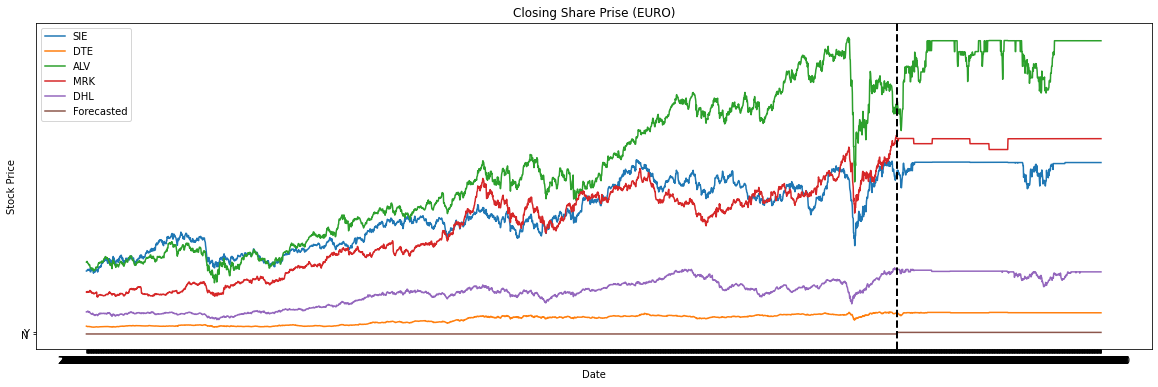

In [69]:
# Plot line chart for each stock
plt.figure(figsize=(20, 6))  # Set the figure size

for column in df3.columns:
    plt.plot(df3.index, df3[column], label=column)

# Add a vertical line at '2020-10-09'
plt.axvline(x='2020-10-09', color='black', linestyle='--', lw=2)

# Configure the plot
plt.title('Closing Share Prise (EURO)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Show the plot
plt.show()

In [70]:
# working days in a year 252
# Prices (include actual and estimated) which is used as input to calculate stock covariance
window = 252
start = len(train)-window
data = df3.iloc[start:]
data = data.reset_index(drop=True)
data = data[['SIE', 'DTE', 'ALV', 'MRK', 'DHL']]

In [71]:
# Forecasted returns which is used as input of optimization algorithm
forecast_returns_df3 = df3[['SIE', 'DTE', 'ALV', 'MRK', 'DHL']].pct_change()
forecast_returns3 = forecast_returns_df3.iloc[start:]
forecast_returns3 = forecast_returns3.reset_index(drop=True)

In [72]:
forecast_returns3

,SIE,DTE,ALV,MRK,DHL
0,0.027360,0.009932,0.028723,0.000482,-0.002648
1,0.000504,0.002588,-0.011262,0.002406,0.002186
2,0.007058,0.014585,0.015662,0.008161,0.000156
3,0.008410,-0.000891,-0.001636,0.009524,-0.004829
4,-0.017871,0.008531,0.007957,0.002830,-0.005949
...,...,...,...,...,...
942,0.000000,0.000000,0.000000,0.000000,0.000000
943,0.000000,0.000000,0.000000,0.000000,0.000000
944,0.000000,0.000000,0.000000,0.000000,0.000000
945,0.000000,0.000000,0.000000,0.000000,0.000000


## 3.1 Maximize the Sharpe ratio

In [73]:
# Perform Maximum the Sharpe ratio optimization model to calculate weights (Durall, 2022)
portfolio_weights_min_var_3 = np.zeros([test.shape[0], len(tickers)])

idx=0
for i in range(portfolio_weights_min_var_3.shape[0]):    
    sel = data.iloc[i+1:window+i+1]
    
    mu = expected_returns.mean_historical_return(sel)
    S = risk_models.sample_cov(sel)

    # optimize for max sharpe ratio
    ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
    
    try:
        weights = ef.max_sharpe()
    except:
        weights = ef.nonconvex_objective(
            objective_functions.sharpe_ratio,
            objective_args=(ef.expected_returns, ef.cov_matrix),
            weights_sum_to_one=True)
    weights = ef.clean_weights(cutoff=0.01, rounding=5)
    data.iloc[window+i] = actual_test.iloc[window+i]

    portfolio_weights_min_var_3[idx]=np.array([weights[j] for j in tickers])
    idx +=1

Text(0.5, 0, 'Time (Years-Months)')

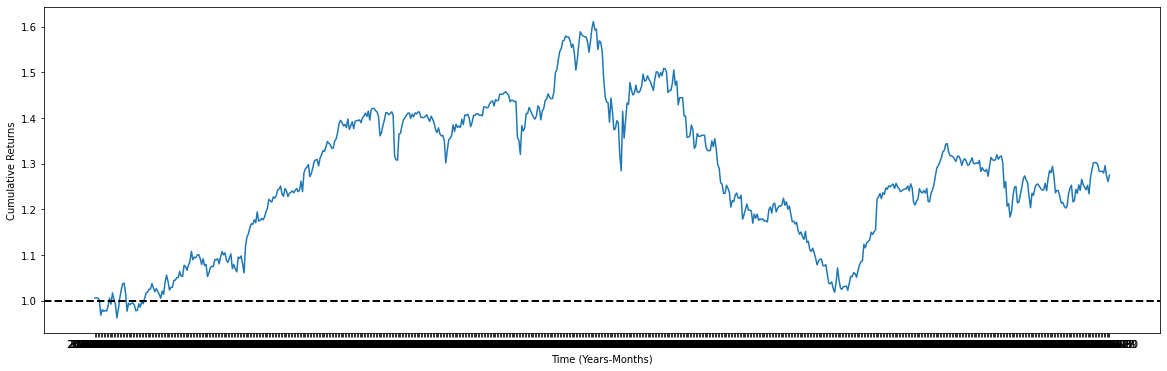

In [74]:
# Calculate porfolio returns from actual returns and resulted weights which is calculated above (Durall, 2022)
return_stocks_min_var_3 = np.sum(actual_returns.multiply(portfolio_weights_min_var_3), axis=1)
cumulative_returns_daily_min_var_3 = (1 + return_stocks_min_var_3).cumprod()
plt.figure(figsize=(20, 6))  # Set the figure size
plt.plot(cumulative_returns_daily_min_var_3)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")

In [75]:
# Calculate portfolio variance
portfolio_variance_min_var_3 = np.dot(portfolio_weights_min_var_3[-1].T, np.dot(np.cov(actual_returns, rowvar=False), portfolio_weights_min_var_3[-1]))
portfolio_variance_min_var_3

0.0002112427578929886

In [76]:
# Calculate standard deviation
std_min_var_3 = np.sqrt(portfolio_variance_min_var_3)
std_min_var_3

0.014534192715558322

In [77]:
# Calculate porfolio returns
cumulative_returns_daily_min_var_3[-1]

1.2751529509474755

In [78]:
# Check negative weights
np.any(portfolio_weights_min_var_3 < 0)

False

In [79]:
return_stocks_min_var_3.index = pd.to_datetime(return_stocks_min_var_3.index)

Start date,2020-10-09
End date,2023-06-30
Total months,33
,Backtest
Annual return,9.213%
Cumulative returns,27.515%
Annual volatility,21.747%
Sharpe ratio,0.51
Calmar ratio,0.25
Stability,0.04
Max drawdown,-36.786%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,36.79,2022-02-09,2022-09-30,NaT,NaN
1,9.40,2021-11-16,2021-11-30,2022-01-03,35
2,8.38,2021-07-13,2021-09-20,2021-10-26,76
3,5.89,2020-11-06,2020-11-10,2020-12-16,29
4,5.39,2020-10-27,2020-10-30,2020-11-04,7


Stress Events,mean,min,max
New Normal,0.04%,-6.42%,10.12%


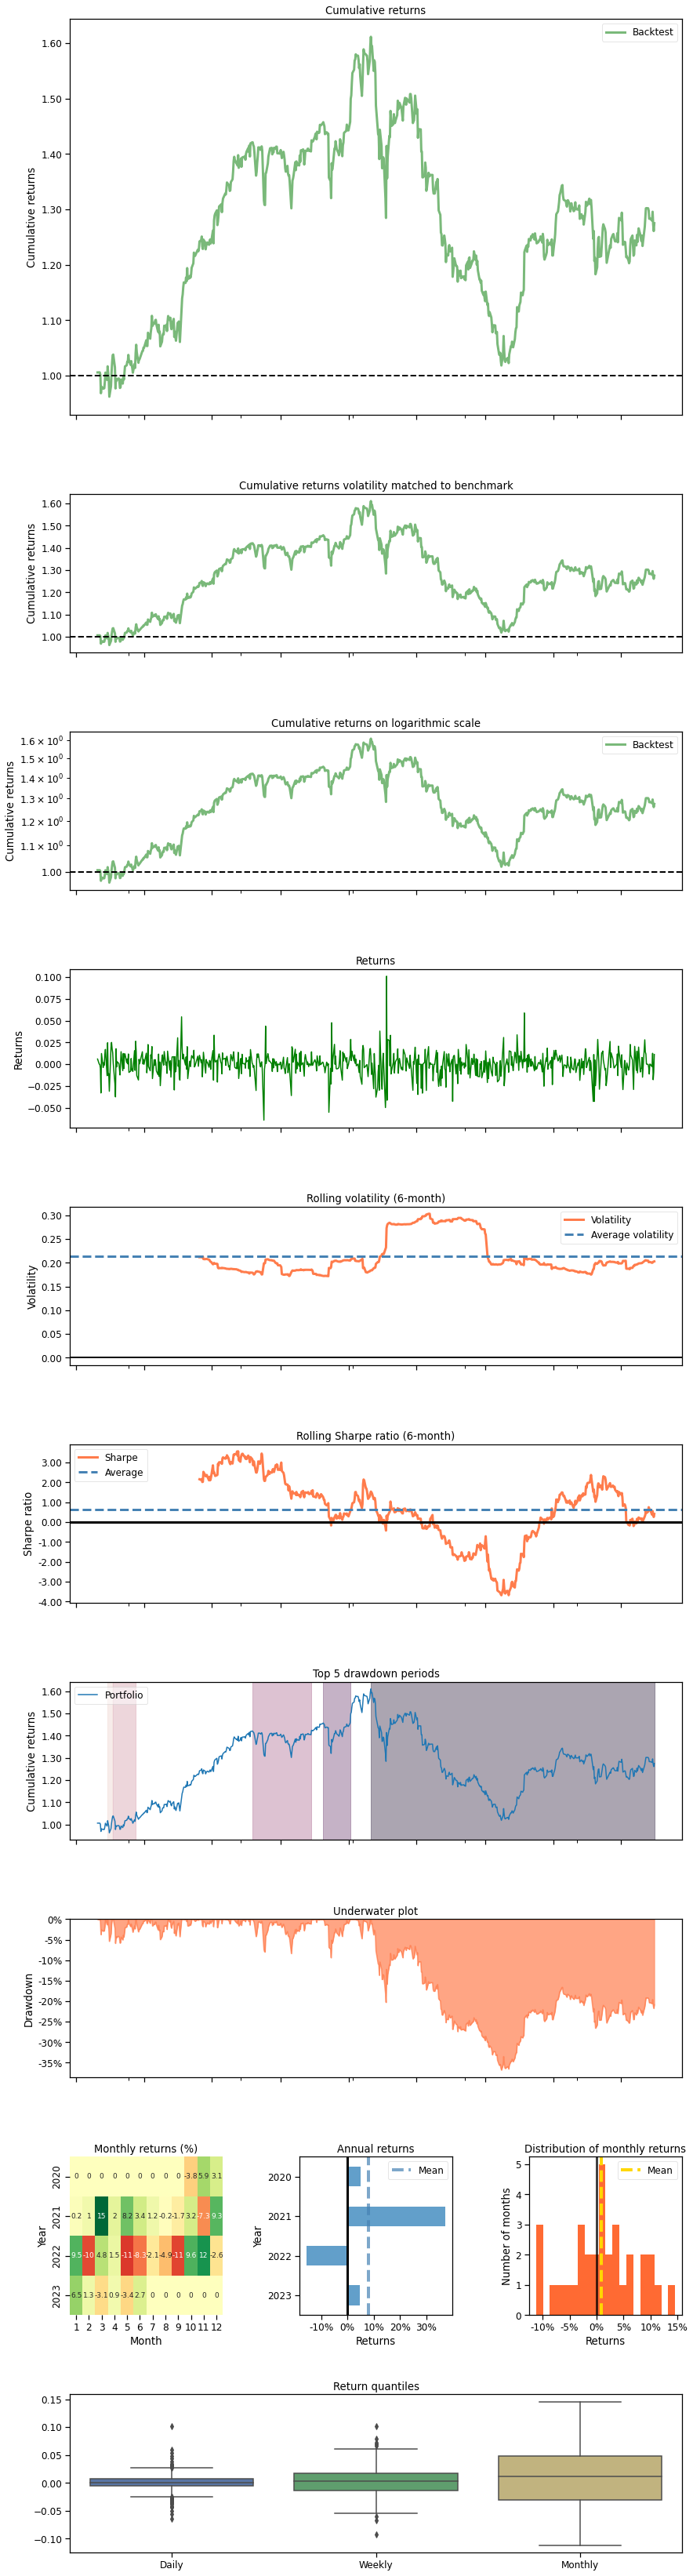

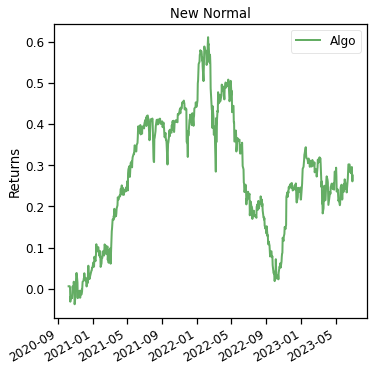

In [80]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = return_stocks_min_var_3, set_context=False)

Text(0.5, 0, 'Time (Years-Months)')

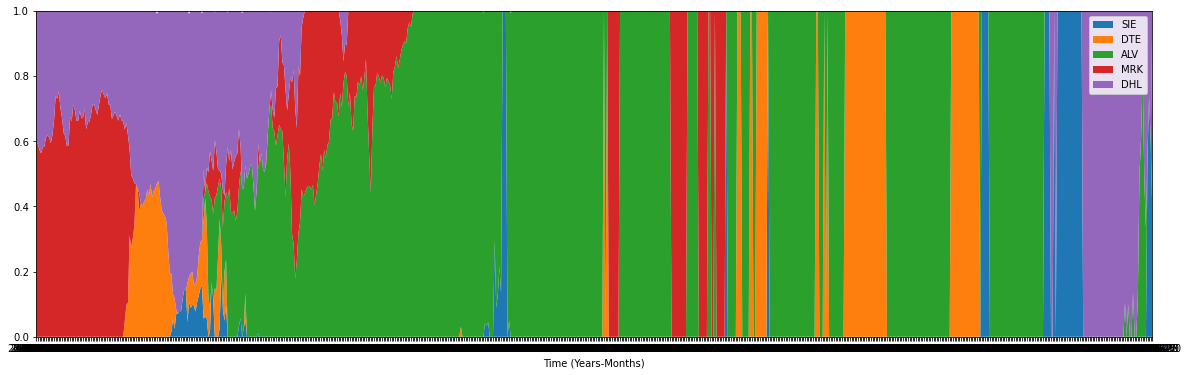

In [81]:
df_plot = pd.DataFrame (portfolio_weights_min_var_3, index = test.index, columns = tickers)
plt.figure(figsize=(20, 6))  # Set the figure size
plt.stackplot(test.index, df_plot['SIE'], df_plot['DTE'], df_plot['ALV'], df_plot['MRK'], df_plot['DHL'], labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel("Time (Years-Months)")

In [82]:
df_plot

,SIE,DTE,ALV,MRK,DHL
Date,,,,,
2020-10-09,0.00000,0.0,0.00000,0.59965,0.40035
2020-10-12,0.00000,0.0,0.00000,0.58992,0.41008
2020-10-13,0.00000,0.0,0.00000,0.57235,0.42765
2020-10-14,0.00000,0.0,0.00000,0.56223,0.43777
2020-10-15,0.00000,0.0,0.00000,0.58152,0.41848
...,...,...,...,...,...
2023-06-26,0.00000,0.0,0.33434,0.00000,0.66566
2023-06-27,0.54926,0.0,0.01101,0.00000,0.43973
2023-06-28,0.73663,0.0,0.00000,0.00000,0.26337


In [83]:
df_plot.to_csv('XGBoost_min_var_3.csv', index=True)

# 4 Summary

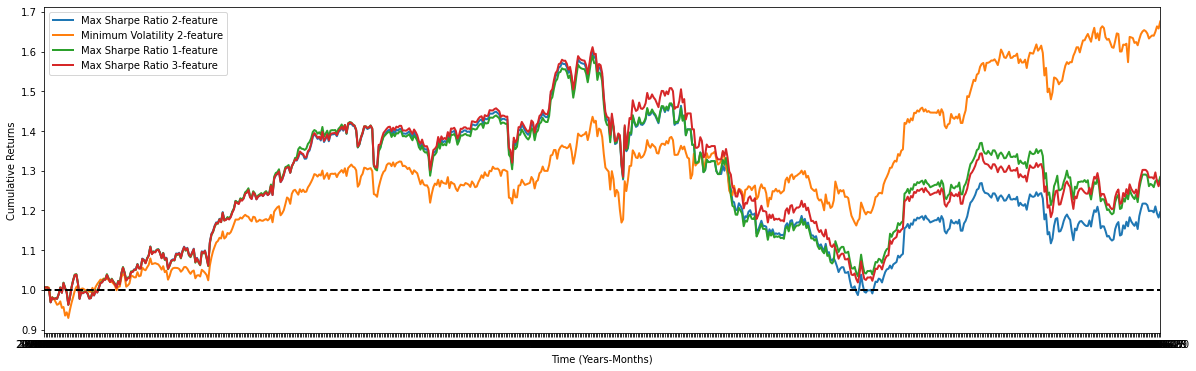

In [84]:
# Plotting all cumulative returns together
x = cumulative_returns_daily_min_var_3.index.values
plt.figure(figsize=(20, 6))  # Set the figure size
plt.plot(x, cumulative_returns_daily_min_var_2, color='tab:blue', label="Max Sharpe Ratio 2-feature", linewidth =2.0)
plt.plot(x, cumulative_returns_daily_min_vol_2, color='tab:orange', label="Minimum Volatility 2-feature", linewidth =2.0)
plt.plot(x, cumulative_returns_daily_min_var_1, color='tab:green', label="Max Sharpe Ratio 1-feature", linewidth =2.0)
plt.plot(x, cumulative_returns_daily_min_var_3, color='tab:red', label="Max Sharpe Ratio 3-feature", linewidth =2.0)
plt.axhline(1, color='black', linestyle='--', linewidth =2.0)
plt.margins(x=0)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")
plt.legend()

# Bibliography

- Durall, R. (2022). Asset allocation: From markowitz to deep reinforcement learning. _arXiv preprint arXiv:2208.07158._